## PVA 3 - Coding Kata

In dieser Coding Kata geht es um die Bildklassifikation mit tiefen neuronalen Netzen bzw. Convolutional Neural Nets.

__Aufgabe 0__

Zum Aufwärmen eine kleine Mathematikaufgabe:

Zeige, dass für die Aktivierungsfunktion $$f(x)=\frac{e^{x}}{1+e^{x}}$$ folgendes Eigenschaft gilt:
$$f'(x)=f(x)(1-f(x))$$

Hinweis: Ableitung unter Verwendung der Quotientenregel $(\frac{h}{g})'=\frac{h'g-g'h}{g^2}$


__Lösung__
$$f'(x) = \frac{e^x (1 + e^x) - e^x e^x}{(1 + e^x)^2} = \frac{e^x}{(1+e^x)^2} = \frac{e^x}{1 + e^x} \cdot \frac{1}{1 + e^x} = \frac{e^x}{1 + e^x} \cdot \left(\frac{1 + e^x}{1 + e^x} - \frac{e^x}{1 + e^x}\right) = f(x)(1-f(x)) $$

__Aufgabe 1__
- Arbeite folgende Google Colab Notebooks durch, die den FASHION_MNIST Datensatz klassifizieren
    1. Keras (mit TensorFlow Backend) [Notebook](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb)
    2. Torch [Notebook](https://colab.research.google.com/drive/1XyLIdWFnWRSwXVOBorpkte70E06F_ITt)
    

__Aufgabe 2__
- Erstelle ein eigenes Convolutional Neural Network zur Klassifikation von Portraitbildern (Lächeln - Nicht-Lächeln)
- Verwende dazu den [Smile-Datensatz](https://github.com/hromi/SMILEsmileD/tree/master/SMILEs), lade den Datensatz auf das eigene Google Drive (Mounting erfolgt mit nachfolgendem Code)
- Verwende dazu die Keras Bibliothek mit TensorFlow-Backend (Google Colab mit GPU-Runtime)


In [8]:
!git clone https://github.com/hromi/SMILEsmileD.git

Cloning into 'SMILEsmileD'...
remote: Enumerating objects: 13190, done.
remote: Total 13190 (delta 0), reused 0 (delta 0), pack-reused 13190
Receiving objects: 100% (13190/13190), 37.48 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [0]:
import tensorflow as tf

In [0]:
from skimage.io import imread_collection
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
negatives = imread_collection('SMILEsmileD/SMILEs/negatives/negatives7/*').concatenate()
positives = imread_collection('SMILEsmileD/SMILEs/positives/positives7/*').concatenate()

In [0]:
X = np.concatenate([negatives, positives])
Y = np.concatenate([np.zeros(len(negatives)), np.ones(len(positives))])

In [0]:
X = X.reshape((-1, 64, 64, 1))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, input_shape=(64, 64, 1), kernel_size=3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
9873/9873 [==============================] - 5s 524us/sample - loss: 5.7526 - acc: 0.7741
Epoch 2/10
9873/9873 [==============================] - 2s 225us/sample - loss: 0.4550 - acc: 0.8448
Epoch 3/10
9873/9873 [==============================] - 2s 229us/sample - loss: 0.3510 - acc: 0.8666
Epoch 4/10
9873/9873 [==============================] - 2s 232us/sample - loss: 0.2922 - acc: 0.8851
Epoch 5/10
9873/9873 [==============================] - 2s 226us/sample - loss: 0.2688 - acc: 0.8936
Epoch 6/10
9873/9873 [==============================] - 2s 234us/sample - loss: 0.2447 - acc: 0.9019
Epoch 7/10
9873/9873 [==============================] - 2s 231us/sample - loss: 0.2309 - acc: 0.9112
Epoch 8/10
9873/9873 [==============================] - 2s 228us/sample - loss: 0.2181 - acc: 0.9170
Epoch 9/10
9873/9873 [==============================] - 2s 229us/sample - loss: 0.2082 - acc: 0.9192
Epoch 10/10
9873/9873 [==============================] - 2s 233us/sample - loss: 0.1998 - a

In [0]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(Y_test, model.predict_classes(X_test))

array([[2156,  188],
       [ 144,  804]])

__Aufgabe 3__

Klassifiziere den Smile-Datensatz unter Verwendung von _Transfer Learning_.
Speichere das trainierte Model.

In [0]:
import tensorflow as tf

In [69]:
base = tf.keras.applications.ResNet50(include_top=False, input_shape=(64, 64, 3), weights='imagenet')


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
model = tf.keras.models.Sequential([
    base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 23,850,433
Trainable params: 23,797,313
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
base.trainable = False

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 23,850,433
Trainable params: 262,721
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
def to_rgb(X):
  temp = []
  for i in X:
     temp.append(np.dstack([i, i, i]))
  return np.array(temp)  

In [0]:
X_train3 = to_rgb(X_train)
X_test3 = to_rgb(X_test)

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [101]:
model.fit(X_train3, Y_train, epochs=10, batch_size=32)

Epoch 1/10
9873/9873 [==============================] - 7s 748us/sample - loss: 0.3621 - acc: 0.8521
Epoch 2/10
9873/9873 [==============================] - 5s 547us/sample - loss: 0.3299 - acc: 0.8664
Epoch 3/10
9873/9873 [==============================] - 5s 550us/sample - loss: 0.3042 - acc: 0.8756
Epoch 4/10
9873/9873 [==============================] - 5s 547us/sample - loss: 0.2918 - acc: 0.8811
Epoch 5/10
9873/9873 [==============================] - 5s 546us/sample - loss: 0.2762 - acc: 0.8897
Epoch 6/10
9873/9873 [==============================] - 6s 561us/sample - loss: 0.2726 - acc: 0.8910
Epoch 7/10
9873/9873 [==============================] - 6s 566us/sample - loss: 0.2695 - acc: 0.8893
Epoch 8/10
9873/9873 [==============================] - 6s 580us/sample - loss: 0.2577 - acc: 0.8947
Epoch 9/10
9873/9873 [==============================] - 6s 569us/sample - loss: 0.2492 - acc: 0.8982
Epoch 10/10
9873/9873 [==============================] - 6s 558us/sample - loss: 0.2484 - a

In [104]:
confusion_matrix(Y_test, model.predict_classes(X_test3))

array([[1865,  478],
       [ 331,  618]])

__Aufgabe 4__
- Erstelle einen Bildklassifikator der folgende 6 Klassen erkennen kann:
    1. Erdbeere
    2. Berge
    3. Dampflokomotive
    4. Schäferhund
    5. Dachs
    6. Stapler
    
Hinweis: Die Klassen sind der ImageNet-Datenbank entnommen.

Testbilder befinden sich auf unserem [Github Repo](https://git.ffhs.ch/joachim.steinwendner/deepl_pibs/tree/master/PVA3/Aufgaben).


In [0]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [0]:
model = tf.keras.applications.InceptionV3(weights='imagenet')

In [0]:
images = []
for i in ['Dachs.jpg', 'berge.jpg', 'dampflokomotive.jpg', 'deutscher-schaeferhund.jpg', 'erdbeere.jpg', 'stapler.jpg']:
  images.append(img_to_array(load_img(i, target_size=(299, 299))))
images = np.array(images)

In [0]:
images = preprocess_input(images)

In [0]:
predictions = decode_predictions(model.predict(images), top=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n02447366', 'badger', 0.9053328), ('n02441942', 'weasel', 0.0021662903), ('n03344393', 'fireboat', 0.0020466668)]


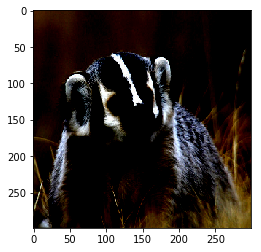

[('n09193705', 'alp', 0.8166092), ('n09468604', 'valley', 0.07980602), ('n03792972', 'mountain_tent', 0.012014354)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


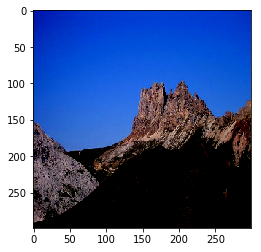

[('n04310018', 'steam_locomotive', 0.8765555), ('n03272562', 'electric_locomotive', 0.004729068), ('n03393912', 'freight_car', 0.0030149126)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


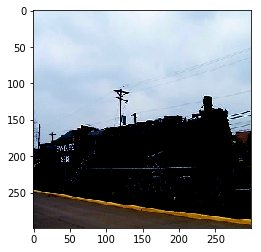

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n02106662', 'German_shepherd', 0.9047781), ('n02105162', 'malinois', 0.0034756034), ('n02916936', 'bulletproof_vest', 0.003277386)]


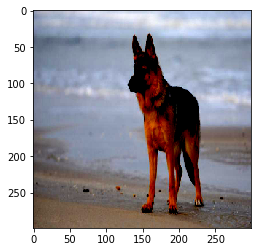

[('n07745940', 'strawberry', 0.996637), ('n07836838', 'chocolate_sauce', 0.00010501316), ('n03887697', 'paper_towel', 7.452047e-05)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


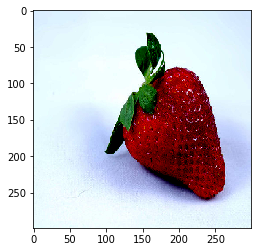

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n03384352', 'forklift', 0.95940065), ('n04252225', 'snowplow', 0.02002723), ('n04461696', 'tow_truck', 0.0008084381)]


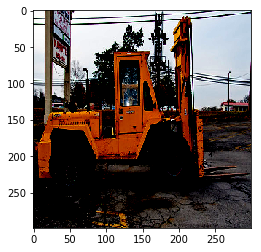

In [147]:
for i in range(len(images)):
  print(predictions[i])
  plt.imshow(images[i])
  plt.show()

__Aufgabe 5__

Erstellen sie einen Bildklassifikator für den [Cats and Dogs Datensatz](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/). Trainieren Sie ein vortrainiertes Netz ihrer Wahl auf diesen spezifischen Datensatz.

Link doesn't go to Cats and Dogs Dataset 🤷‍